In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Učitat ću tablicu za drive motor senzor varijable brzine za prvi stroj.

In [15]:
data = "python/data/FL01/drive_motor_V_eff.csv"
inf = pd.read_csv(data, sep = ';' , header = 0)
inf

,machine_name,sensor_type,date_measurement,start_timestamp,end_timestamp,realvalue,unit
0,FL01,drive_motor_V_eff,2017-09-02,2017-09-02 15:26:42.12,2017-09-02 15:26:42.12,0.565,mm/s
1,FL01,drive_motor_V_eff,2017-09-02,2017-09-02 15:26:44.933,2017-09-02 15:26:44.933,1.023,mm/s
2,FL01,drive_motor_V_eff,2017-09-02,2017-09-02 15:26:47.763,2017-09-02 15:26:47.763,1.447,mm/s
3,FL01,drive_motor_V_eff,2017-09-02,2017-09-02 15:26:50.59,2017-09-02 15:26:50.59,1.736,mm/s
4,FL01,drive_motor_V_eff,2017-09-02,2017-09-02 15:26:53.403,2017-09-02 15:26:53.403,2.233,mm/s
...,...,...,...,...,...,...,...
33935,FL01,drive_motor_V_eff,2019-07-24,2019-07-24 22:20:19.287,2019-07-24 22:20:19.287,2.817,mm/s
33936,FL01,drive_motor_V_eff,2019-07-24,2019-07-24 22:20:20.727,2019-07-24 22:20:20.727,2.825,mm/s
33937,FL01,drive_motor_V_eff,2019-07-24,2019-07-24 22:20:22.09,2019-07-24 22:20:22.09,2.835,mm/s
33938,FL01,drive_motor_V_eff,2019-07-24,2019-07-24 22:20:23.5,2019-07-24 22:20:23.5,2.809,mm/s


### Proba

Koraci:
- probat ću učitati cijeli file podataka
- sortirati ih po strojevima
- sortirati po jednom stroju pa onda po senzorima


In [13]:
full_data_doc = "python/data-full.csv"
data_full = pd.read_csv(full_data_doc, sep = ';' , header = 0)

In [14]:
data_full

,machine_name,sensor_type,date_measurement,start_timestamp,end_timestamp,realvalue,unit
0,FL01,drive_gear_V_eff,2017-09-02,2017-09-02 15:26:42.823,2017-09-02 15:26:42.823,0.395,mm/s
1,FL01,drive_gear_V_eff,2017-09-02,2017-09-02 15:26:45.653,2017-09-02 15:26:45.653,0.577,mm/s
2,FL01,drive_gear_V_eff,2017-09-02,2017-09-02 15:26:48.467,2017-09-02 15:26:48.467,0.717,mm/s
3,FL01,drive_gear_V_eff,2017-09-02,2017-09-02 15:26:51.293,2017-09-02 15:26:51.293,0.832,mm/s
4,FL01,drive_gear_V_eff,2017-09-02,2017-09-02 15:26:54.107,2017-09-02 15:26:54.107,0.941,mm/s
...,...,...,...,...,...,...,...
3860429,FL07,lifting_motor_a_max,2019-07-10,2019-07-10 06:03:34.897,2019-07-10 06:03:34.897,1239.279,mg (milli-g)
3860430,FL07,lifting_motor_a_max,2019-07-10,2019-07-10 06:03:35.553,2019-07-10 06:03:35.553,1240.598,mg (milli-g)
3860431,FL07,lifting_motor_a_max,2019-07-10,2019-07-10 06:03:36.21,2019-07-10 06:03:36.21,1239.001,mg (milli-g)
3860432,FL07,lifting_motor_a_max,2019-07-10,2019-07-10 06:03:36.863,2019-07-10 06:03:36.863,1229.654,mg (milli-g)


In [24]:
strojevi = ["FL01"] #mogla sam dodati FL07
df = data_full[data_full.machine_name.isin(strojevi)]
df.head() #vraća po defaultu prvih 5 redaka

,machine_name,sensor_type,date_measurement,start_timestamp,end_timestamp,realvalue,unit
0,FL01,drive_gear_V_eff,2017-09-02,2017-09-02 15:26:42.823,2017-09-02 15:26:42.823,0.395,mm/s
1,FL01,drive_gear_V_eff,2017-09-02,2017-09-02 15:26:45.653,2017-09-02 15:26:45.653,0.577,mm/s
2,FL01,drive_gear_V_eff,2017-09-02,2017-09-02 15:26:48.467,2017-09-02 15:26:48.467,0.717,mm/s
3,FL01,drive_gear_V_eff,2017-09-02,2017-09-02 15:26:51.293,2017-09-02 15:26:51.293,0.832,mm/s
4,FL01,drive_gear_V_eff,2017-09-02,2017-09-02 15:26:54.107,2017-09-02 15:26:54.107,0.941,mm/s


In [29]:
df.groupby("sensor_type").realvalue.max()
#samo proba za testiranje funkcija

sensor_type
drive_gear_V_eff          1.333197
drive_gear_a_max       1100.310969
drive_motor_V_eff         3.710185
drive_motor_a_max      1214.393898
drive_wheel_V_eff         1.971247
drive_wheel_a_max       859.176200
idle_wheel_V_eff          2.270012
idle_wheel_a_max        935.349496
lifting_gear_V_eff        0.884066
lifting_gear_a_max     1030.722143
lifting_motor_V_eff       1.323842
lifting_motor_a_max     808.585943
Name: realvalue, dtype: float64

In [31]:
df.groupby("sensor_type").realvalue.min()

sensor_type
drive_gear_V_eff        0.117
drive_gear_a_max       59.881
drive_motor_V_eff       0.418
drive_motor_a_max      64.559
drive_wheel_V_eff       0.061
drive_wheel_a_max      28.152
idle_wheel_V_eff        0.055
idle_wheel_a_max       27.838
lifting_gear_V_eff      0.027
lifting_gear_a_max     11.918
lifting_motor_V_eff     0.068
lifting_motor_a_max    15.879
Name: realvalue, dtype: float64

##### proba za učitavanje fileova 

+ Koristila sam Klepecov file kako bi probala linkati fileove
+ Sve radi samo treba paziti na path
+ probat pokrenut njegov file
+ zatim sam otvorila obrada.py i htjela pokrenuti funkciju find_correlation ali ipak ću je probat sama pokrenut

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.close('all')
import python.obrada as ob

'''
	!!!
	User functions:
	Plot(machine, sensor) - plots machine with x-axis being start_timestamp
	Plot_rolling_mean(machine, sensor, window) - same but adds rolling mean
	Plot2d(matrix, xmin, xmax, ymin, ymax) - plots points
					....................
						 optional
'''
manual_repair = {
	"FL01" : [
		'2018-11-13 0:0:0.0',
		'2019-02-08 0:0:0.0',
		'2018-02-12 0:0:0.0',
	],
	"FL02" : [
		'2019-04-02 0:0:0.0'
	],
	"FL03" : [
		'2019-04-02 0:0:0.0'
	],
	"FL04" : [],
	"FL05" : [],
	"FL06" : [],
	"FL07" : [
		'2019-04-02 0:0:0.0'
	]
}
# Gets data from data folder
def Plot_data(machine = 'FL01', sensor = ob.list_sensors['FL01'][2]):
	print(machine, sensor)

	filename = f"python/data/{machine}/{sensor}.csv"

	file = None
	try:
		file = open(filename, 'r', encoding = 'utf-8-sig')
	except:
		print('Failed to find data')
		return []

	column_names = file.readline().strip('\n').split(';')
	column_names = list(map(lambda s: s.strip('"'), column_names))

	data = pd.read_csv(file, sep = ';', names = column_names)

	x = 'start_timestamp'
	y = 'realvalue'

	data = data[[x, y]]
	data.start_timestamp = pd.to_datetime(data[x], format='%Y-%m-%d %H:%M:%S.%f')
	data.set_index([x], inplace = True)

	return data

def Plot(machine = 'FL01', sensor = ob.list_sensors['FL01'][0]):

	data = Plot_data(machine, sensor)
	if len(data) == 0:
		return

	data.plot()

	for when in manual_repair[machine]:
		plt.axvline(x = when, color = '0.2', ls = '--')

	plt.legend(['realvalue', 'manual_repair'])
	plt.show(block = False)

temp = None
#ako se nista ne pokaze samo pokreni komandu opet
# Plot rolling window mean of some machine and sensor
# Can plot multiple machines / sensors on same graph if called multiple times in a row
def Plot_rolling_mean(machine = 'FL01', sensor = ob.list_sensors['FL01'][0], window = '10d'):

	data = Plot_data(machine, sensor)
	if len(data) == 0:
		return

	data['mean'] = data['realvalue'].rolling(window, min_periods = 1).mean()
	global temp
	if temp:
		temp = data['mean'].plot(ax = temp)
	else:
		temp = data['mean'].plot()

	for when in manual_repair[machine]:
		plt.axvline(x = when, color = '0.2', ls = '--')

	plt.legend(['rolling mean', 'manual_repair'])
	plt.show(block = False)

'''
	date format in '%Y-%m-%d %H:%M:%S.%f'
	example:
	"2017-11-30" or
	"2019-10-25 23:02:03.5"
'''
def Trim_data(start_date, end_date, data):
	data = data[(start_date < data.index) & (data.index < end_date)]
	return data

# Displays distribution of realvalues in given date range for machine and sensor
def Distribution(start_date, end_date, machine = 'FL02', sensor = ob.list_sensors['FL02'][0]):
	data = Trim_data(start_date, end_date, Plot_data(machine, sensor))
	if len(data) == 0:
		return

	# odjebi datume
	data.sort_values(by = ['realvalue'], inplace = True)
	data.reset_index(drop = True, inplace = True)

	data.plot(kind = 'density')
	data.plot(kind = 'hist', bins = 100)

	plt.show(block = False)

def Close():
	plt.close('all')

def Show():
	plt.show(block = False)

'''
	plots list of 2d points
	ex. data = [[1, 2], [3, 1], [2, 1]]
	can be called multiple times
	if window is not terminated old points will stay
'''
def Plot2d(data, x_min = 0, x_max = 0, y_min = 0, y_max = 0):
	x = [p[0] for p in data]
	y = [p[1] for p in data]

	plt.plot(x, y, 'ro')
	if x_min != x_max:
		plt.xlim(x_min, x_max)
	if y_min != y_max:
		plt.ylim(y_min, y_max)

	plt.show(block = False)

FL01 drive_motor_V_eff


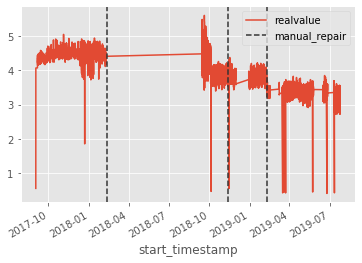

FL01 drive_motor_A_max


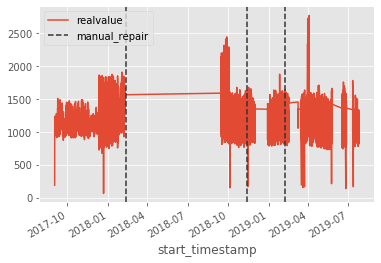

In [49]:
Plot("FL01","drive_motor_V_eff")
Plot("FL01","drive_motor_A_max")

FL01 drive_gear_V_eff


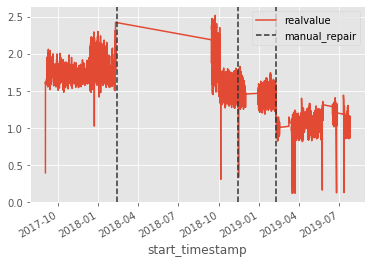

FL01 drive_gear_A_max


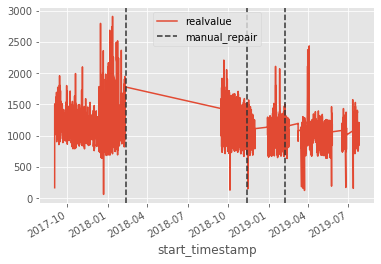

In [67]:
Plot("FL01","drive_gear_V_eff")
Plot("FL01","drive_gear_A_max")

In [69]:
data = "python/data/FL01/drive_motor_V_eff.csv"
inf = pd.read_csv(data, sep = ';' , header = 0)
list_d_m = inf['realvalue'].tolist()
list_d_m

[0.565,
 1.023,
 1.4469999999999998,
 1.736,
 2.233,
 2.426,
 2.708,
 2.863,
 2.969,
 3.11,
 3.2460000000000004,
 3.3569999999999998,
 3.5210000000000004,
 3.5389999999999997,
 3.889,
 3.91,
 4.024,
 4.031000000000001,
 4.06,
 4.066,
 4.07,
 4.107,
 4.203,
 4.261,
 4.399,
 4.383,
 4.409,
 4.373,
 4.332,
 4.268,
 4.255,
 4.262,
 4.337,
 4.289,
 4.38,
 4.341,
 4.329,
 4.275,
 4.228,
 4.238,
 4.218999999999999,
 4.22,
 4.29,
 4.276,
 4.435,
 4.375,
 4.4030000000000005,
 4.35,
 4.302,
 4.263,
 4.265,
 4.275,
 4.348,
 4.292,
 4.428999999999999,
 4.373,
 4.355,
 4.343999999999999,
 4.309,
 4.232,
 4.223,
 4.293,
 4.343999999999999,
 4.308,
 4.4239999999999995,
 4.381,
 4.394,
 4.372,
 4.312,
 4.2669999999999995,
 4.227,
 4.255,
 4.272,
 4.204,
 4.305,
 4.232,
 4.2780000000000005,
 4.268,
 4.185,
 4.171,
 4.147,
 4.168,
 4.221,
 4.176,
 4.363,
 4.294,
 4.341,
 4.359,
 4.285,
 4.269,
 4.223,
 4.242,
 4.294,
 4.253,
 4.462,
 4.4110000000000005,
 4.465,
 4.379,
 4.311,
 4.3180000000000005,
 4.3,

In [70]:
data = "python/data/FL01/drive_gear_V_eff.csv"
inf = pd.read_csv(data, sep = ';' , header = 0)
list_d_g = inf['realvalue'].tolist()
list_d_g

[0.395,
 0.5770000000000001,
 0.7170000000000001,
 0.8320000000000001,
 0.941,
 1.042,
 1.1059999999999999,
 1.176,
 1.245,
 1.258,
 1.4169999999999998,
 1.4509999999999998,
 1.462,
 1.4909999999999999,
 1.5230000000000001,
 1.568,
 1.6159999999999999,
 1.62,
 1.614,
 1.5930000000000002,
 1.693,
 1.704,
 1.704,
 1.6880000000000002,
 1.692,
 1.679,
 1.6869999999999998,
 1.6840000000000002,
 1.675,
 1.63,
 1.7169999999999999,
 1.709,
 1.6880000000000002,
 1.6740000000000002,
 1.6740000000000002,
 1.675,
 1.669,
 1.646,
 1.624,
 1.578,
 1.692,
 1.702,
 1.693,
 1.671,
 1.69,
 1.6680000000000001,
 1.685,
 1.671,
 1.632,
 1.588,
 1.7719999999999998,
 1.765,
 1.7590000000000001,
 1.736,
 1.7169999999999999,
 1.7169999999999999,
 1.704,
 1.681,
 1.665,
 1.6230000000000002,
 1.88,
 1.876,
 1.8559999999999999,
 1.845,
 1.851,
 1.8619999999999999,
 1.83,
 1.801,
 1.765,
 1.726,
 1.956,
 1.931,
 1.891,
 1.848,
 1.814,
 1.798,
 1.7919999999999998,
 1.7530000000000001,
 1.7169999999999999,
 1.669,
 

In [72]:
import numpy as np
np.corrcoef(list_d_m, list_d_g)
# ne radi zbog razlika u vremenu o čem je Luka pričao, saznat je li uspio!!

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 33940 and the array at index 1 has size 32554